In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5da58583eb234c8ba5019380787c21e9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
print(data.keys())

dict_keys(['status', 'data'])


In [5]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


In [138]:
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12566,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.999482e+07,1.999482e+07,False,1.364847e+12,NaN,1,NaN,NaN,None,2026-02-25T22:57:00.000Z,68260.028607,5.209788e+10,27.6190,-1.112036,6.461700,2.818431,-22.477640,-22.048300,-25.230197,1.364847e+12,57.9005,1.433461e+12,None,2026-02-25T22:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-25 22:59:38.328599
1,1027,Ethereum,ETH,ethereum,11588,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206923e+08,1.206923e+08,True,2.509904e+11,NaN,2,NaN,NaN,None,2026-02-25T22:57:00.000Z,2079.589211,2.711315e+10,44.0626,-1.075386,11.812409,6.822414,-28.872810,-29.125677,-30.907161,2.509904e+11,10.6505,2.509904e+11,None,2026-02-25T22:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-25 22:59:38.328599
2,825,Tether USDt,USDT,tether,171679,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.836242e+11,1.879400e+11,True,1.879898e+11,NaN,3,NaN,NaN,None,2026-02-25T22:57:00.000Z,1.000265,1.014856e+11,32.1506,-0.018905,0.023853,0.077092,0.132238,0.089059,0.026488,1.836729e+11,7.7919,1.879898e+11,None,2026-02-25T22:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-25 22:59:38.328599
3,52,XRP,XRP,xrp,1802,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.101858e+10,9.998571e+10,False,1.449009e+11,NaN,4,NaN,NaN,None,2026-02-25T22:57:00.000Z,1.449216,4.220980e+09,51.5294,-1.951988,7.148953,1.968476,-23.648450,-22.245914,-34.237855,8.842910e+10,3.7503,1.449216e+11,None,2026-02-25T22:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-25 22:59:38.328599
4,1839,BNB,BNB,bnb,3136,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363589e+08,1.363589e+08,1.363589e+08,False,8.591633e+10,NaN,5,NaN,NaN,None,2026-02-25T22:58:00.000Z,630.074993,2.652062e+09,51.0883,-0.852930,7.608970,4.160159,-28.168225,-25.149414,-29.447325,8.591633e+10,3.6458,8.591634e+10,None,2026-02-25T22:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-25 22:59:38.328599


In [7]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '5da58583eb234c8ba5019380787c21e9',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\User\Downloads\Automating Crypto API\API_Data.csv'):
        df.to_csv(r'C:\Users\User\Downloads\Automating Crypto API\API_Data.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\User\Downloads\Automating Crypto API\API_Data.csv', mode='a', header=False)
        
    # Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    # df = pd.concat([df, new_row]) # Join the old df with the new row
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [139]:

df2 = pd.read_csv(r'C:\Users\User\Downloads\Automating Crypto API\API_Data.csv')
df2.head(5)

,Index,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12566,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.999478e+07,1.999478e+07,False,1.379516e+12,NaN,1,NaN,NaN,NaN,2026-02-25T22:08:00.000Z,68993.789704,5.179390e+10,24.3104,-0.263953,7.528621,4.018198,-21.569029,-21.241238,-24.496974,1.379516e+12,57.8394,1.448870e+12,NaN,2026-02-25T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,10:26.6
1,1,1027,Ethereum,ETH,ethereum,11588,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206923e+08,1.206923e+08,True,2.544140e+11,NaN,2,NaN,NaN,NaN,2026-02-25T22:08:00.000Z,2107.955656,2.665967e+10,43.0220,1.550413,13.390884,8.432783,-27.969934,-28.055544,-30.456625,2.544141e+11,10.6659,2.544140e+11,NaN,2026-02-25T22:08:00.000Z,NaN,NaN,NaN,NaN,NaN,10:26.6
2,2,825,Tether USDt,USDT,tether,171679,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.836242e+11,1.879400e+11,True,1.879956e+11,NaN,3,NaN,NaN,NaN,2026-02-25T22:07:00.000Z,1.000296,9.969450e+10,28.7095,0.003858,0.028937,0.068828,0.137051,0.100842,0.034116,1.836786e+11,7.7012,1.879956e+11,NaN,2026-02-25T22:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,10:26.6
3,3,52,XRP,XRP,xrp,1802,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.101858e+10,9.998571e+10,False,1.481978e+11,NaN,4,NaN,NaN,NaN,2026-02-25T22:07:00.000Z,1.482189,4.077865e+09,46.6589,0.975625,9.286058,4.295191,-21.854462,-20.387014,-33.057308,9.044110e+10,3.7905,1.482189e+11,NaN,2026-02-25T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,10:26.6
4,4,1839,BNB,BNB,bnb,3136,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363589e+08,1.363589e+08,1.363589e+08,False,8.669165e+10,NaN,5,NaN,NaN,NaN,2026-02-25T22:07:00.000Z,635.760842,2.614582e+09,48.2683,0.591971,8.497558,5.170156,-27.448768,-24.493869,-29.078586,8.669165e+10,3.6344,8.669165e+10,NaN,2026-02-25T22:07:00.000Z,NaN,NaN,NaN,NaN,NaN,10:26.6


In [140]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3.head(5)

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-1.112036,6.461700,2.818431,-22.477640,-22.048300,-25.230197
Ethereum,-1.075386,11.812409,6.822414,-28.872810,-29.125677,-30.907161
Tether USDt,-0.018905,0.023853,0.077092,0.132238,0.089059,0.026488
XRP,-1.951988,7.148953,1.968476,-23.648450,-22.245914,-34.237855
BNB,-0.852930,7.608970,4.160159,-28.168225,-25.149414,-29.447325


In [141]:
df4 = df3.stack()
df4.head(5)

name                                 
Bitcoin  quote.USD.percent_change_1h     -1.112036
         quote.USD.percent_change_24h     6.461700
         quote.USD.percent_change_7d      2.818431
         quote.USD.percent_change_30d   -22.477640
         quote.USD.percent_change_60d   -22.048300
dtype: float64

In [115]:
type(df4)

pandas.core.series.Series

In [143]:
df5 = df4.to_frame(name='values')
df5.head(15)

values
name                                               
Bitcoin     quote.USD.percent_change_1h   -1.112036
            quote.USD.percent_change_24h   6.461700
            quote.USD.percent_change_7d    2.818431
            quote.USD.percent_change_30d -22.477640
            quote.USD.percent_change_60d -22.048300
            quote.USD.percent_change_90d -25.230197
Ethereum    quote.USD.percent_change_1h   -1.075386
            quote.USD.percent_change_24h  11.812409
            quote.USD.percent_change_7d    6.822414
            quote.USD.percent_change_30d -28.872810
            quote.USD.percent_change_60d -29.125677
            quote.USD.percent_change_90d -30.907161
Tether USDt quote.USD.percent_change_1h   -0.018905
            quote.USD.percent_change_24h   0.023853
            quote.USD.percent_change_7d    0.077092

In [117]:
df5.count()

values    90
dtype: int64

In [145]:
# Index = pd.Index(range(90))

df6 = df5.reset_index()
df6.head(15)

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-1.112036
1,Bitcoin,quote.USD.percent_change_24h,6.461700
2,Bitcoin,quote.USD.percent_change_7d,2.818431
3,Bitcoin,quote.USD.percent_change_30d,-22.477640
4,Bitcoin,quote.USD.percent_change_60d,-22.048300
5,Bitcoin,quote.USD.percent_change_90d,-25.230197
6,Ethereum,quote.USD.percent_change_1h,-1.075386
7,Ethereum,quote.USD.percent_change_24h,11.812409
8,Ethereum,quote.USD.percent_change_7d,6.822414
9,Ethereum,quote.USD.percent_change_30d,-28.872810


In [146]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head(15)

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-1.112036
1,Bitcoin,quote.USD.percent_change_24h,6.461700
2,Bitcoin,quote.USD.percent_change_7d,2.818431
3,Bitcoin,quote.USD.percent_change_30d,-22.477640
4,Bitcoin,quote.USD.percent_change_60d,-22.048300
5,Bitcoin,quote.USD.percent_change_90d,-25.230197
6,Ethereum,quote.USD.percent_change_1h,-1.075386
7,Ethereum,quote.USD.percent_change_24h,11.812409
8,Ethereum,quote.USD.percent_change_7d,6.822414
9,Ethereum,quote.USD.percent_change_30d,-28.872810


In [120]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-1.112036
1,Bitcoin,24h,6.461700
2,Bitcoin,7d,2.818431
3,Bitcoin,30d,-22.477640
4,Bitcoin,60d,-22.048300
5,Bitcoin,90d,-25.230197
6,Ethereum,1h,-1.075386
7,Ethereum,24h,11.812409
8,Ethereum,7d,6.822414
9,Ethereum,30d,-28.872810


In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 2000x2500 with 0 Axes>

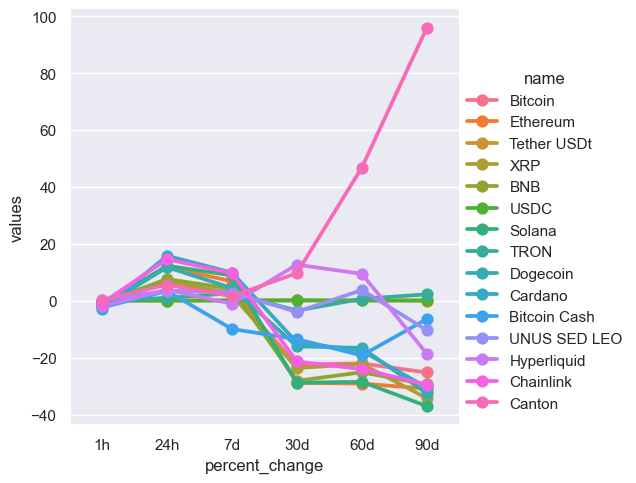

<Figure size 2000x2500 with 0 Axes>

In [137]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')
plt.figure(figsize=(20, 25))

In [147]:
df10 = df2[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,68993.789704,10:26.6
15,Bitcoin,69040.153073,11:28.0
30,Bitcoin,69060.966946,12:29.3
45,Bitcoin,69138.779099,13:30.7
60,Bitcoin,69166.435160,14:32.0
75,Bitcoin,69166.435160,15:33.3
90,Bitcoin,69122.005109,16:34.6
105,Bitcoin,69093.854259,17:36.0
120,Bitcoin,69038.133921,18:37.2
135,Bitcoin,68956.488175,19:38.6


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

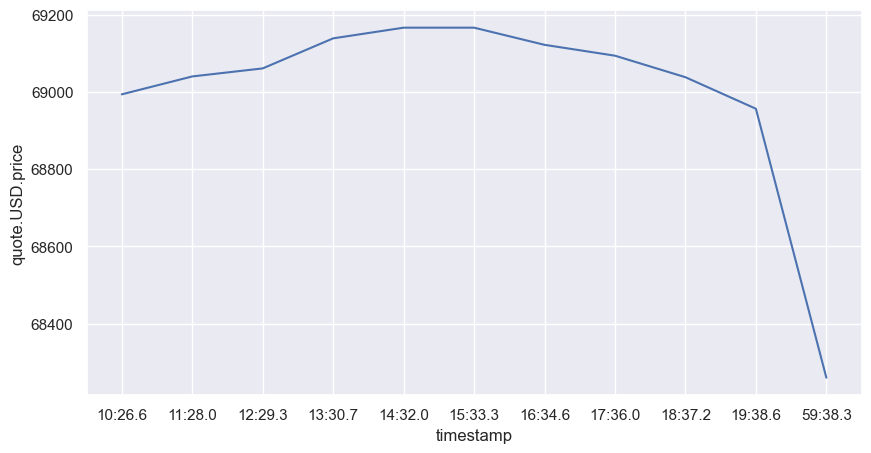

In [131]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)